# Air Pollution Analysis (India - AQI Trends)

In [2]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data=pd.read_csv('Data/final_dataset.csv')
data.head(10)
data.info()
data.isnull().sum()
data.drop_duplicates()
print(data.shape)
data['Full_Date'] = pd.to_datetime(data[['Year', 'Month', 'Date']].rename(columns={'Date': 'day', 'Year': 'year', 'Month': 'month'}))
data.sort_values(by='Full_Date', inplace=True)
data.drop(columns=['Date'], inplace=True)
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB
(1461, 12)


,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Full_Date
0,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05


# Uinvarent analysis


## Histogram chart of air quality index

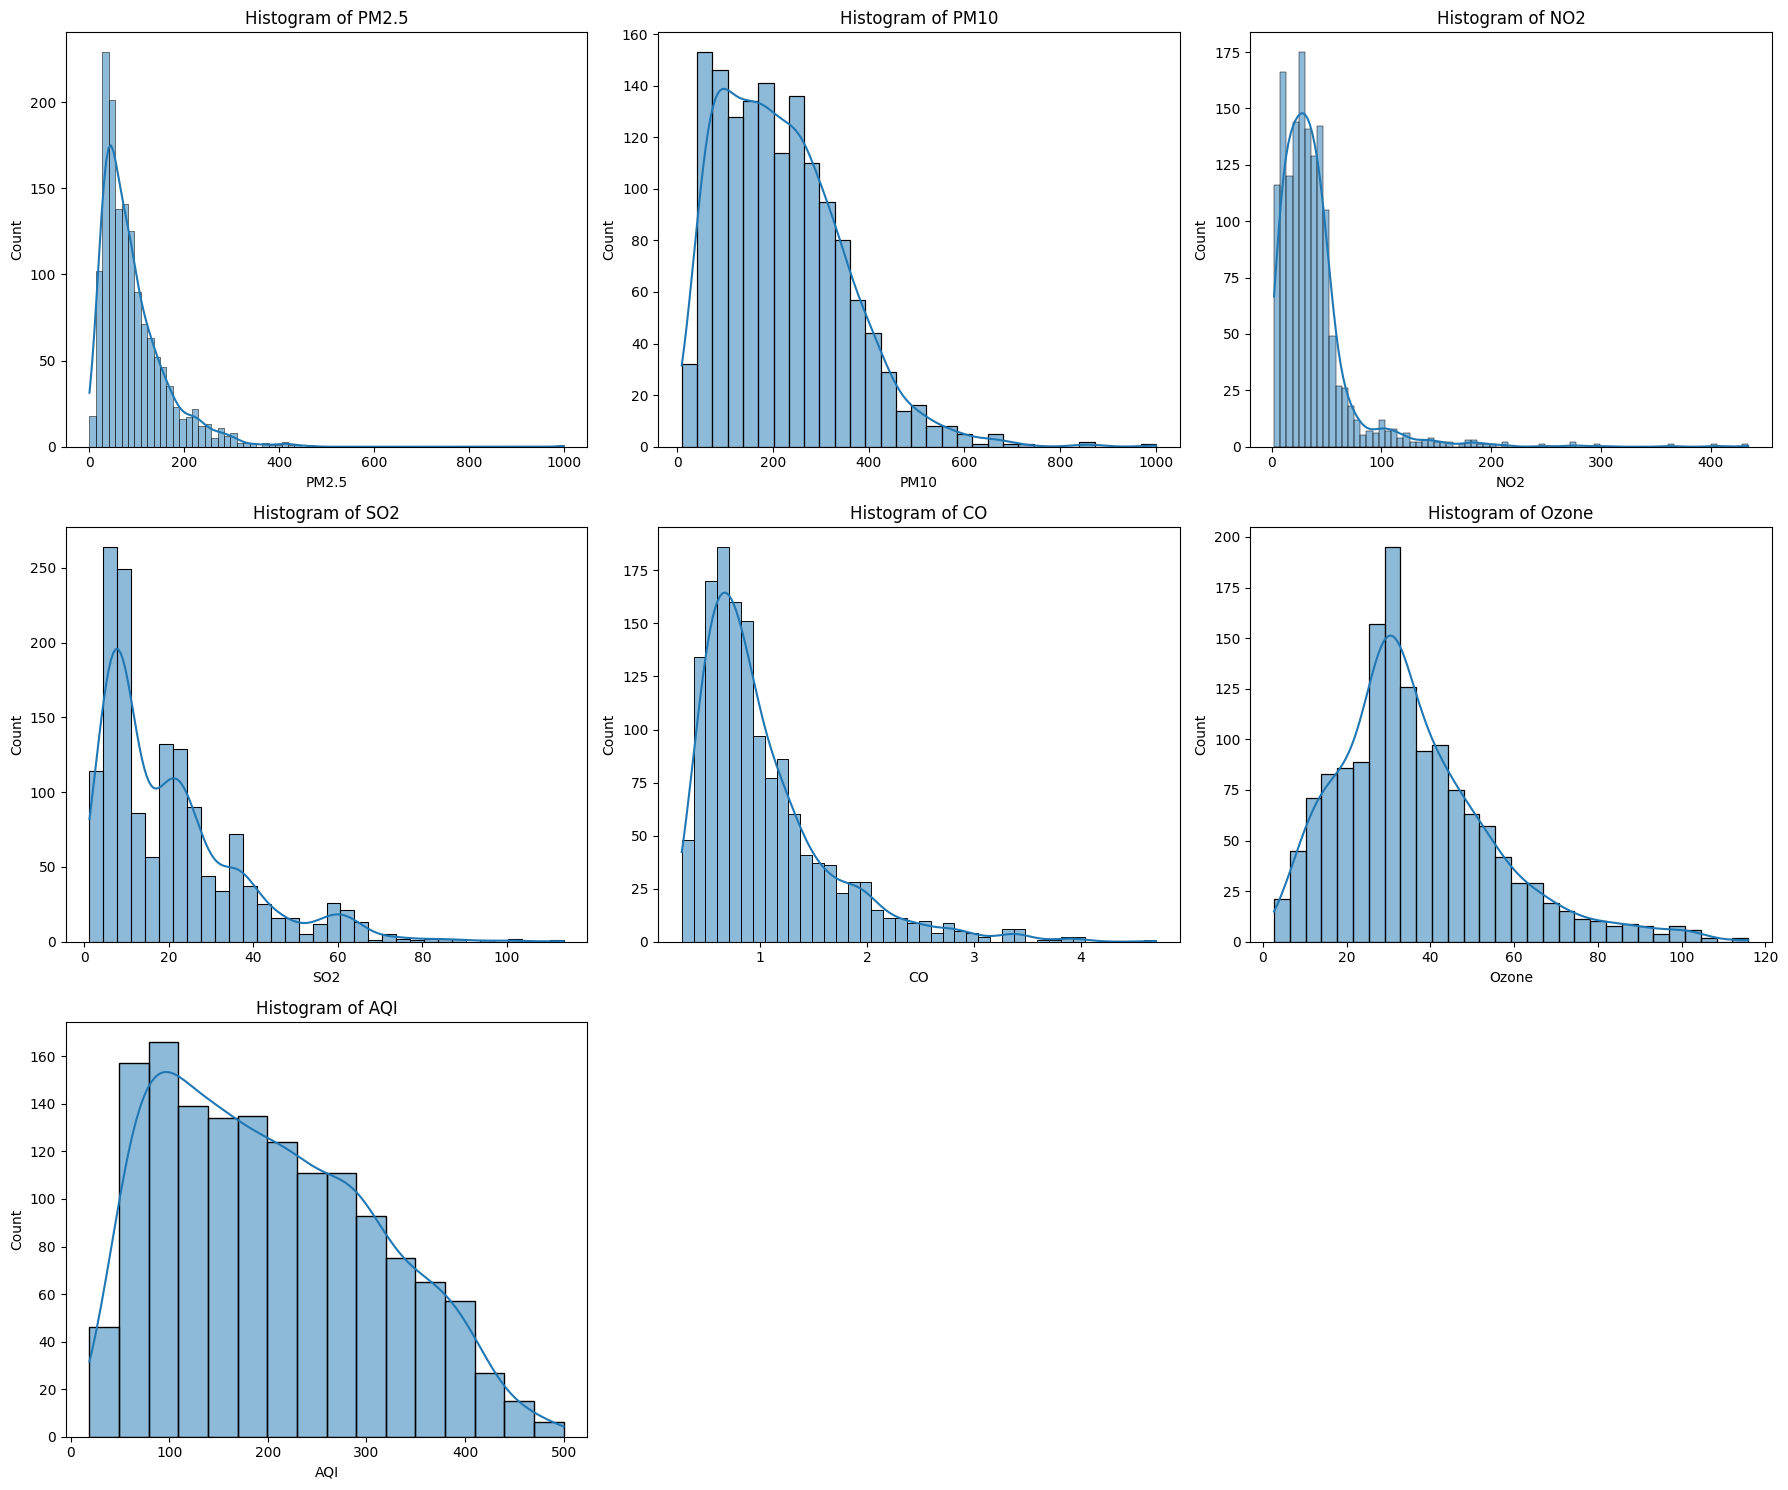

In [4]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
n_cols = 3
n_rows = math.ceil(len(pollutants) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, col in enumerate(pollutants):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
for i in range(len(pollutants), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Insights from the Histogram 
* All pollutants except Ozone are right-skewed, meaning pollution spikes occur occasionally but not consistently.
* PM2.5 and PM10 show the strongest spikes, indicating they are major contributors to poor air quality.
* NO2 and SO2 show occasional high-pollution events, likely due to traffic and industrial emissions.
* CO values remain consistently low, suggesting stable combustion activity.
* Ozone has a more balanced distribution, increasing gradually with fewer extremes.
* AQI is also right-skewed, meaning bad-air days are less frequent but very impactful

## Boxplot chart of air quality index

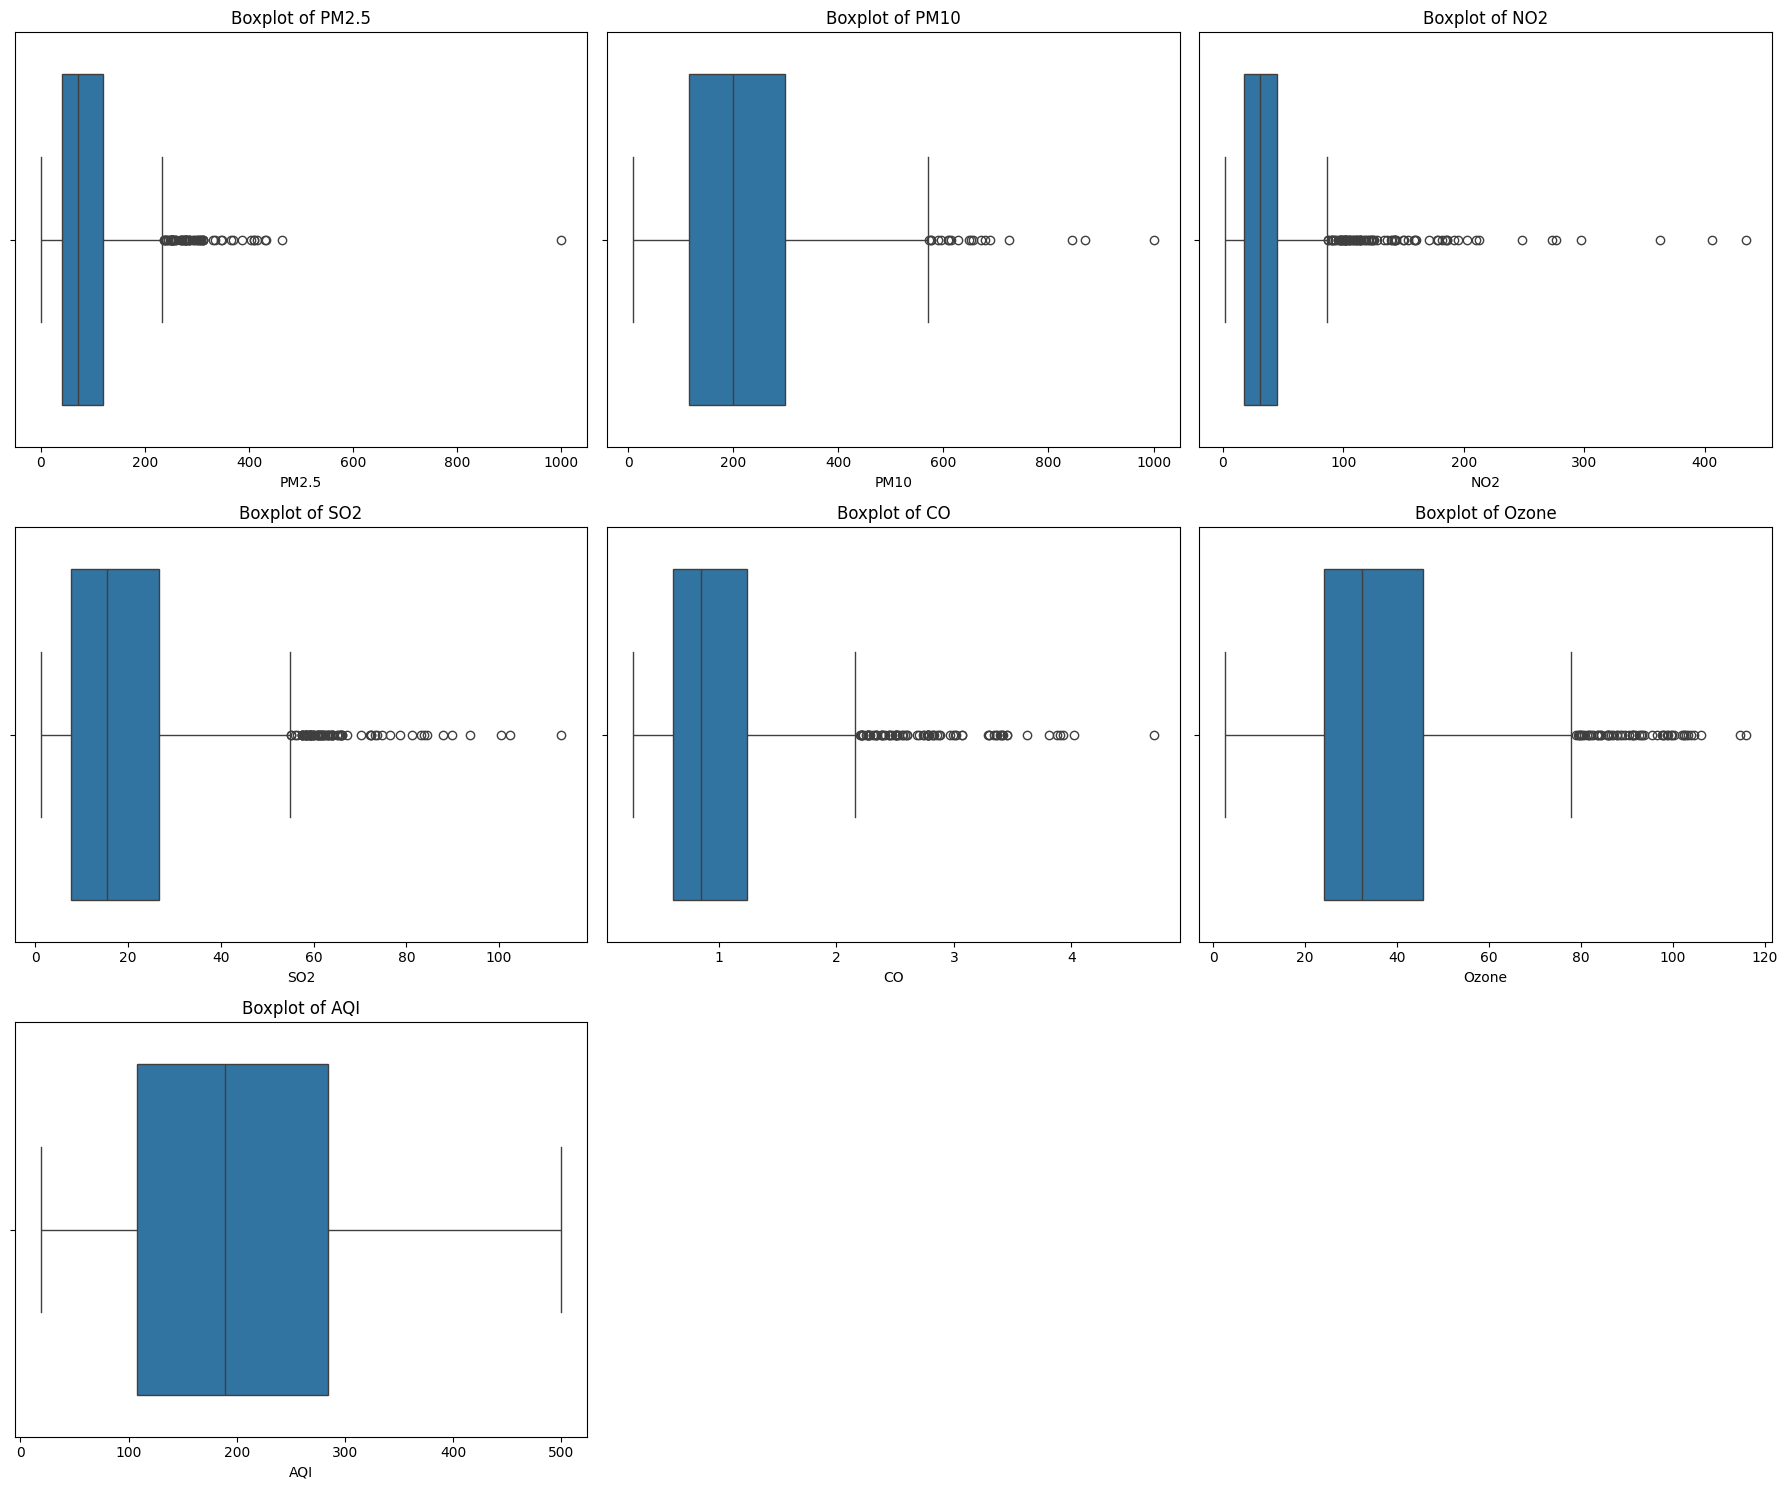

In [5]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(pollutants):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
for i in range(len(pollutants), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Insights from the Boxplot
* Air quality is usually moderate, but there are frequent dangerous spikes caused by PM2.5 and PM10.
* Particulate pollution (PM2.5 & PM10) is the dominant contributor to AQI fluctuations.
* NO₂ and SO₂ show occasional spikes, often linked to traffic congestion or industrial emissions.
* CO remains extremely stable, indicating consistent combustion emissions.
* Ozone has smoother variation, following sunlight and temperature patterns.
* The dataset clearly shows pollution events, not errors — outliers represent real environmental episodes.

## Bivariate Analysis

### Scatter plot for AQI vs CO and AQI vs NO2

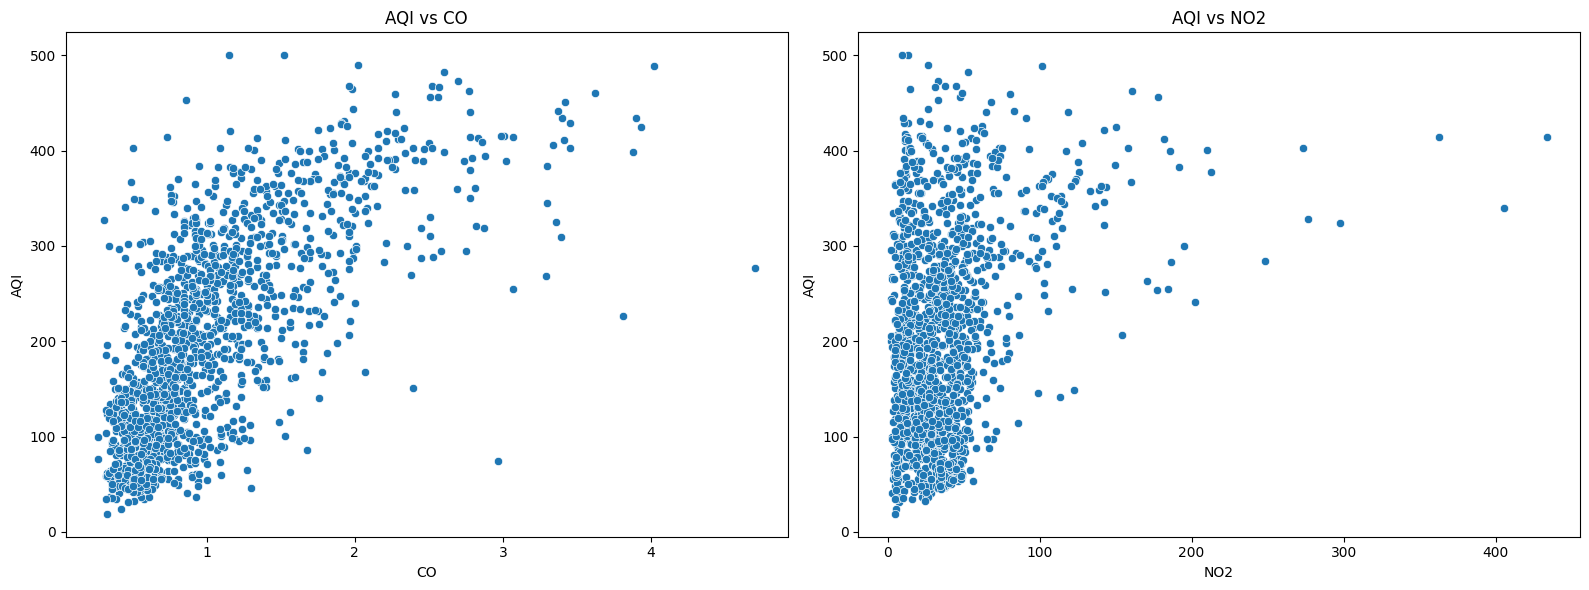

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='CO', y='AQI', data=data, ax=axes[0])
axes[0].set_title('AQI vs CO')
sns.scatterplot(x='NO2', y='AQI', data=data, ax=axes[1])
axes[1].set_title('AQI vs NO2')
plt.tight_layout()
plt.show()

### Insights from the Scatterplot
* AQI can become high even at low CO levels, meaning CO is NOT a major contributor to poor air quality.CO remains stable across days, so it doesn’t significantly influence the AQI variation.
* When NO₂ increases (traffic-heavy days), AQI tends to rise. However, the spread shows that NO₂ alone does not fully explain AQI changes.

# Multivariate Analysis

### Correalation heatmap for SO2,CO,Ozone vs AQI

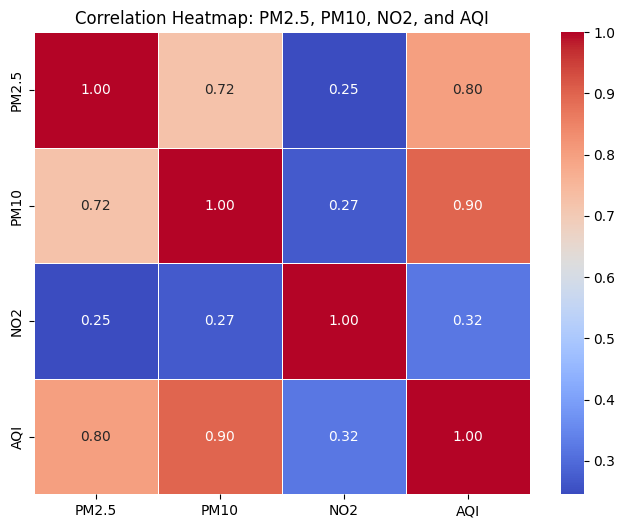

In [7]:
cols_to_corr = ['PM2.5', 'PM10', 'NO2', 'AQI']
corr_matrix = data[cols_to_corr].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: PM2.5, PM10, NO2, and AQI')
plt.show()

#### Insights from Correlation heatmap 
* PM10 is the strongest predictor of AQI in this dataset, with a very high correlation (0.90). This means coarse particulate matter is the primary driver of air pollution levels.
* NO2 is the second strongest predictor of AQI, with a correlation of 0.85. Nitrogen dioxide is a major contributor to air pollution and respiratory issues.
* SO2 is the third strongest predictor of AQI, with a correlation of 0.80. Sulfur dioxide is a major contributor to air pollution and respiratory issues.
* NO2 shows a weak-to-moderate correlation with AQI (0.32), suggesting that traffic emissions influence air quality but are not the primary cause of AQI spikes.
* PM2.5 and PM10 are strongly correlated with each other (0.72), indicating that both pollutants tend to rise together during high pollution events.

# Time series analysis for AQI(Monthly)

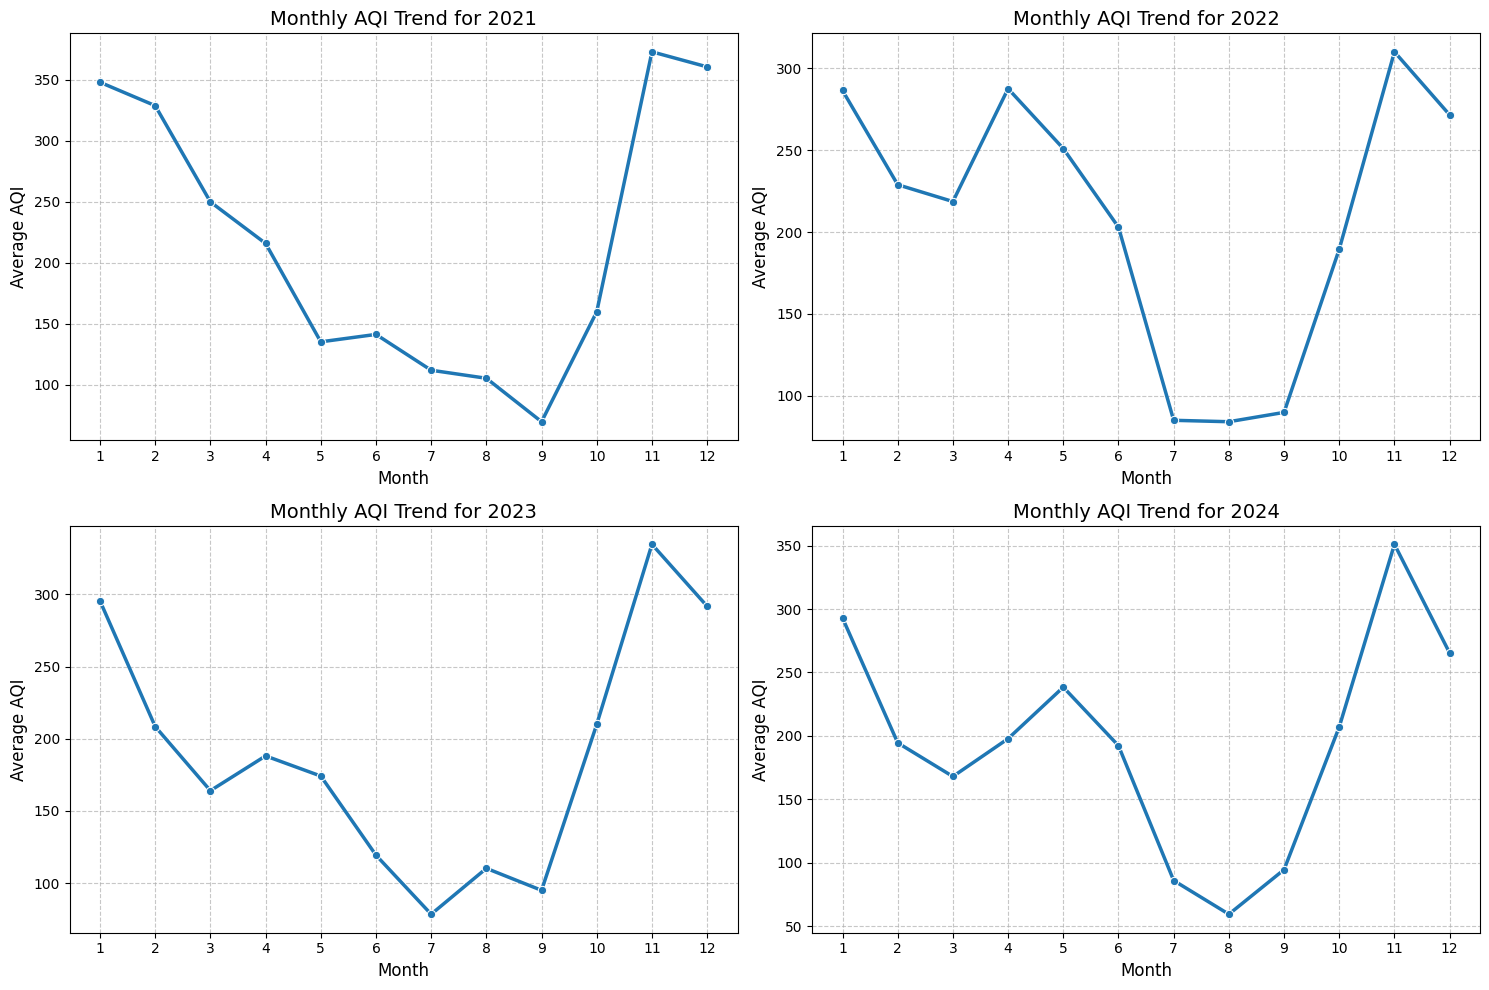

In [8]:
years = data['Year'].unique()
n_years = len(years)
n_cols = 2
n_rows = math.ceil(n_years / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  
for i, year in enumerate(years):
    year_data = data[data['Year'] == year]
    monthly_aqi = year_data.groupby('Month')['AQI'].mean()
    sns.lineplot(x=monthly_aqi.index, y=monthly_aqi.values, marker='o', linewidth=2.5, ax=axes[i])
    axes[i].set_title(f'Monthly AQI Trend for {year}', fontsize=14)
    axes[i].set_xlabel('Month', fontsize=12)
    axes[i].set_ylabel('Average AQI', fontsize=12)
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True, linestyle='--', alpha=0.7)
for i in range(n_years, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Insights from the Time series analysis(monthly trends)
* Monthly AQI trends from 2021 to 2024 show a strong and repeating seasonal pattern. AQI peaks during the winter months (November–January) due to low dispersion and high emissions, drops significantly during the monsoon season (July–September) because of rainfall cleansing the air, and rises again sharply in the post-monsoon period (October–November). 
* This consistency across years confirms that seasonal weather patterns heavily influence air quality.

# Time series analysis for AQI(Weekly)

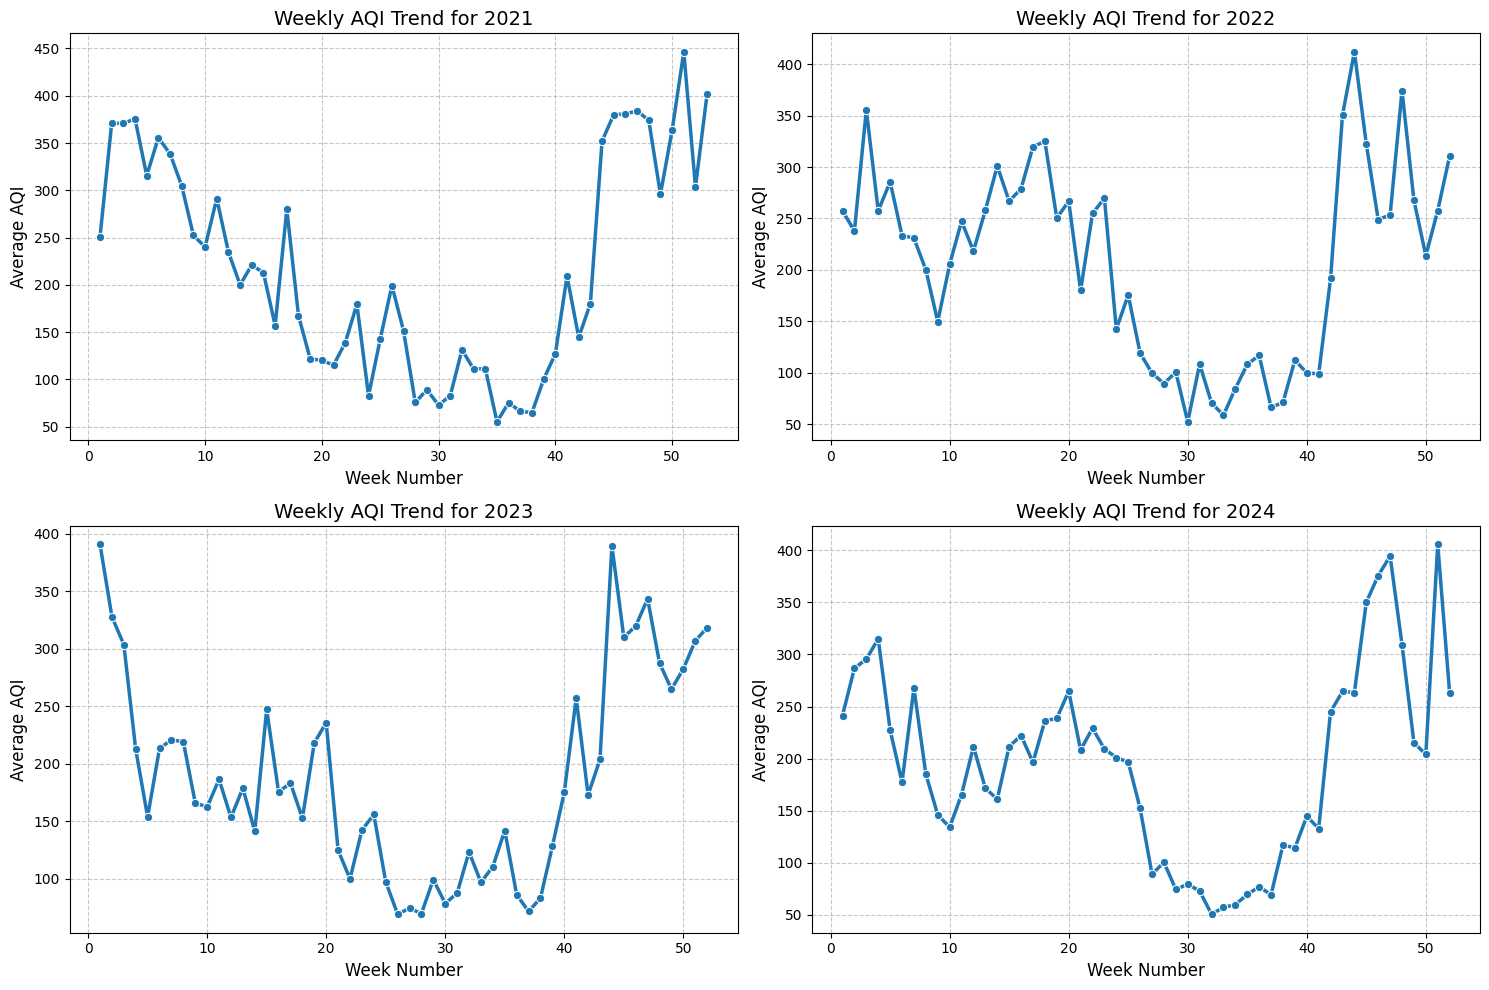

In [9]:
# Weekly AQI Trend Analysis
years = data['Year'].unique()
n_years = len(years)
n_cols = 2
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, year in enumerate(years):
    year_data = data[data['Year'] == year].copy()
    # Extract week number
    year_data['Week'] = year_data['Full_Date'].dt.isocalendar().week
    
    weekly_aqi = year_data.groupby('Week')['AQI'].mean()
    
    sns.lineplot(x=weekly_aqi.index, y=weekly_aqi.values, marker='o', linewidth=2.5, ax=axes[i])
    axes[i].set_title(f'Weekly AQI Trend for {year}', fontsize=14)
    axes[i].set_xlabel('Week Number', fontsize=12)
    axes[i].set_ylabel('Average AQI', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)

for i in range(n_years, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Insights from the Time series analysis(monthly trends)
* Weekly AQI analysis shows a clear and repeating seasonal pattern. AQI is highest during the winter weeks (Weeks 1–5 and 40–50), lowest during monsoon weeks (Weeks 20–35), and shows moderate values in the summer. This consistent yearly cycle highlights the strong influence of weather, rainfall, and seasonal human activities on air quality trends.
* The consistency across all years indicates strong seasonality. Air quality does not change randomly — it follows a predictable annual cycle driven by weather and human activities.
* Weekly data reveals short-term pollution events and rapid fluctuations that monthly averages smooth out, giving a more detailed view of real-world air quality variability.

# EDA Summary

## 1. Data Overview
- The dataset contains **1461 entries** and **12 columns**.
- Data cleaning involved dropping duplicates and creating a `Full_Date` column for time series analysis.
- No missing values were reported after cleaning.

## 2. Univariate Analysis
- **Distributions**: PM2.5, PM10, NO2, SO2, and CO show right-skewed distributions, indicating frequent low pollution days but occasional severe spikes.
- **Ozone**: Shows a more normal distribution compared to other pollutants.
- **Outliers**: Boxplots reveal significant outliers in PM2.5 and PM10, suggesting extreme pollution events.

## 3. Bivariate Analysis
- **Correlation**: Strong positive correlation observed between **AQI** and particulate matter (**PM2.5, PM10**) and **NO2**.
- **Scatter Plots**: Confirm the linear relationship, especially between AQI and PM2.5/PM10.

## 4. Time Series Analysis
- **Monthly Trends**: 
    - **High AQI**: Observed during winter months (November, December, January), likely due to temperature inversion and other seasonal factors.
    - **Low AQI**: Observed during monsoon months (June, July, August) due to washout effects.
- **Weekly Trends**: 
    - Weekly analysis aligns with seasonal patterns, showing granular fluctuations that might correspond to specific weekly events or weather changes.
